# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [27]:

import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']

### Now take a look at the shapes of the X and y matricies 

In [28]:
X,y.shape

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 (70000,))

In [29]:
X.shape

(70000, 784)

In [30]:
y.shape

(70000,)

### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [31]:
X[36000]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

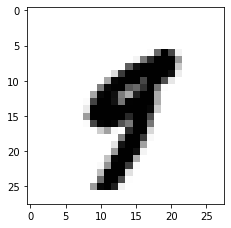

In [32]:
import matplotlib.pyplot as plt
a=X[36000].reshape(28,28)
plt.figure(figsize=(12,4.5))

#use imshow to plot the array
plt.subplot(131)
plt.imshow(a,                         #numpy array generating the image
           cmap = 'binary',             #color map used to specify colors
           interpolation='nearest'    #algorithm used to blend square colors; with 'nearest' colors will not be blended
          )

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [33]:
y[36000]

'9'

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [34]:
X_train=X[:60000]
X_test=X[60000:]
X_train.shape
X_test.shape

(10000, 784)

In [35]:
y_train=y[:60000]
y_test=y[60000:]
y_train.shape
y_test.shape

(10000,)

### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [36]:
y_train_5 = y_train == "5"
print(y_train_5)
y_train.shape

[ True False False ...  True False False]


(60000,)

In [37]:
y_test_5 = y_test == "5"
print(y_test_5)
y_test.shape

[False False False ... False  True False]


(10000,)

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [38]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train_5)

/home/davidgozalo/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [39]:
lr.predict(X_test)

array([False, False, False, ..., False,  True, False])

In [40]:
a=lr.predict_proba(X_test)
a.shape

(10000, 2)

### Does the classifier predict correctly the 36000th digit we picked before?

In [41]:
# Yes, it predicts correctly the 36000th, since it says "False" which means "It is not a 5"
a=lr.predict(X_train)
a.shape
a[36000]

False

In [42]:
import pandas as pd
df=pd.DataFrame(lr.predict_proba(X_train), columns=lr.classes_)
df.loc[36000]

False    0.997681
True     0.002319
Name: 36000, dtype: float64

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [43]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [44]:
never_5_clf.fit(X_train, y_train)

In [45]:
never_5_clf.predict(X_test)

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [46]:
# 1 Confusion Matrix

In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
y_pred_never_5=never_5_clf.predict(X_test)

In [49]:
y_pred_lr=lr.predict(X_test)

In [50]:
confusion_matrix(y_test_5, y_pred_lr)

array([[9034,   74],
       [ 147,  745]])

In [51]:
cm_lr=confusion_matrix(y_test_5, y_pred_lr)

In [52]:
True_negatives_lr=cm_lr[0][0]
print(True_negatives_lr)

9034


In [53]:
False_positives_lr=cm_lr[0][1]
print(False_positives_lr)

74


In [54]:
False_negatives_lr=cm_lr[1][0]
print(False_negatives_lr)

147


In [55]:
True_positives_lr=cm_lr[1][1]
print(True_positives_lr)

745


In [59]:
cm_never_5=confusion_matrix(y_test_5, y_pred_never_5)

In [60]:
True_negatives_never_5=cm_never_5[0][0]
print(True_negatives_never_5)

9108


In [61]:
False_positives_never_5=cm_never_5[0][1]
print(False_positives_never_5)

0


In [62]:
False_negatives_never_5=cm_never_5[1][0]
print(False_negatives_never_5)

892


In [63]:
True_positives_never_5=cm_never_5[1][1]
print(True_positives_never_5)

0


In [64]:
# 2. Precision

In [65]:
from sklearn.metrics import precision_score

In [66]:
precision_score(y_test_5, y_pred_lr)

0.9096459096459096

In [67]:
precision_score(y_test_5, y_pred_never_5)

/home/davidgozalo/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [68]:
# 3. Recall

In [69]:
from sklearn.metrics import recall_score

In [70]:
recall_score(y_test_5, y_pred_lr)

0.8352017937219731

In [71]:
recall_score(y_test_5, y_pred_never_5)

0.0

In [72]:
#4 f1 score

In [73]:
from sklearn.metrics import f1_score

In [74]:
f1_score(y_test_5, y_pred_lr, average='macro')

0.9293760011790693

In [75]:
f1_score(y_test_5, y_pred_lr, average='micro')

0.9779

In [76]:
f1_score(y_test_5, y_pred_lr, average='weighted')

0.9774726563018544

In [77]:
f1_score(y_test_5, y_pred_never_5, average='macro')

0.47665899099853465

In [78]:
f1_score(y_test_5, y_pred_never_5, average='micro')

0.9108

In [79]:
f1_score(y_test_5, y_pred_never_5, average='weighted')

0.8682820180029306

### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

In [80]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


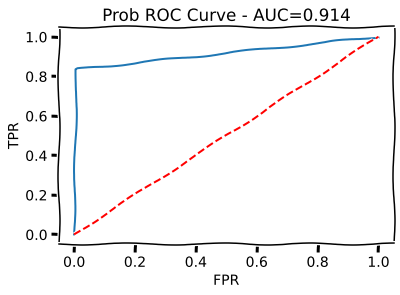

In [81]:

roc_curve(y_test_5, y_pred_lr)
with plt.xkcd():
    fpr, tpr, thresholds = roc_curve(y_test_5, y_pred_lr)
    a = roc_auc_score(y_test_5, y_pred_lr)
    plt.plot(fpr, tpr)
    plt.plot(fpr, fpr, 'r--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(f'Prob ROC Curve - AUC={a:.3f}')
    plt.show();

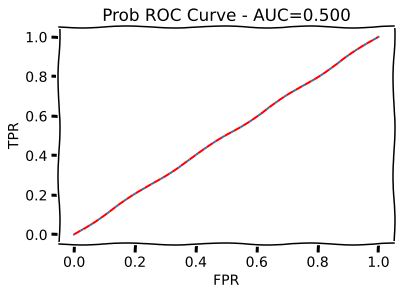

In [82]:
roc_curve(y_test_5, y_pred_never_5)
with plt.xkcd():
    fpr, tpr, thresholds = roc_curve(y_test_5, y_pred_never_5)
    a = roc_auc_score(y_test_5, y_pred_never_5)
    plt.plot(fpr, tpr)
    plt.plot(fpr, fpr, 'r--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(f'Prob ROC Curve - AUC={a:.3f}')
    plt.show();

### Now find the roc_auc_score for each. 

In [87]:
y_pred=never_5_clf.predict(X_test)
print(roc_auc_score(y_test_5, y_pred_lr))

0.9135385341029717


In [88]:
y_pred=lr.predict(X_test)
print(roc_auc_score(y_test_5, y_pred_never_5))

0.5


### What does this metric tell you? Which classifier works better with this metric in mind?

In [ ]:
#Whith this metric in mind, the logistic classifier works better [AUC 0.913 > 0.5]